# ANDREW COURSE SVM PROBLEM ex6.m
## dataset: ex6data2.mat

In [1]:
import scipy.io
mat = scipy.io.loadmat('ex6data2.mat')

In [2]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:54 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0.107143 , 0.60307  ],
        [0.093318 , 0.649854 ],
        [0.0979263, 0.705409 ],
        ...,
        [0.975806 , 0.439474 ],
        [0.989631 , 0.425439 ],
        [0.996544 , 0.414912 ]]),
 'y': array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
       

In [5]:
import numpy as np
A1=np.asarray(mat['X'])

In [6]:
A2=np.asarray(mat['y'])

In [8]:
z=np.hstack((A1,A2))
z

array([[0.107143 , 0.60307  , 1.       ],
       [0.093318 , 0.649854 , 1.       ],
       [0.0979263, 0.705409 , 1.       ],
       ...,
       [0.975806 , 0.439474 , 1.       ],
       [0.989631 , 0.425439 , 1.       ],
       [0.996544 , 0.414912 , 1.       ]])

In [9]:
z.shape

(863, 3)

In [11]:
ro=np.arange(864)
ro=np.delete(ro,0)

In [14]:
import pandas as pd
df = pd.DataFrame(data=z, index=ro, columns=["X1", "X2","y"])

In [16]:
df.head()

,X1,X2,y
1,0.107143,0.603070,1.0
2,0.093318,0.649854,1.0
3,0.097926,0.705409,1.0
4,0.155530,0.784357,1.0
5,0.210829,0.866228,1.0


In [17]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt

In [18]:
df.dtypes

X1    float64
X2    float64
y     float64
dtype: object

In [19]:
df['y'] = df['y'].astype('int')

In [20]:
df.y.unique()

array([1, 0], dtype=int64)

In [21]:
import numpy as np    
idx_0 = np.where(df.y==0)
idx_1 = np.where(df.y==1)

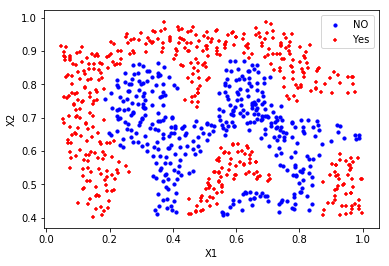

In [22]:
plt.scatter(df.iloc[idx_0].X1, df.iloc[idx_0].X2, s=10, c='b', marker="o", label='NO')
plt.scatter(df.iloc[idx_1].X1, df.iloc[idx_1].X2, s=10, c='r', marker="+", label='Yes')
plt.ylabel('X2')
plt.xlabel('X1')
plt.legend()
plt.show()

In [24]:
ft_df=df[['X1','X2']]
ft_X=np.asarray(ft_df)
ft_X[0:5]

array([[0.107143 , 0.60307  ],
       [0.093318 , 0.649854 ],
       [0.0979263, 0.705409 ],
       [0.15553  , 0.784357 ],
       [0.210829 , 0.866228 ]])

In [27]:
#normalize the data
ft_X=preprocessing.StandardScaler().fit(ft_X).transform(ft_X.astype(float))
ft_X[0:5]

array([[-1.55510316, -0.57455232],
       [-1.60935726, -0.27992752],
       [-1.59127269,  0.06993314],
       [-1.36521576,  0.5671125 ],
       [-1.14820327,  1.08269962]])

In [28]:
ft_y=np.asarray(df['y'])
ft_y[0:5]

array([1, 1, 1, 1, 1])

In [29]:
X_train, X_test, y_train, y_test = train_test_split( ft_X, ft_y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (690, 2) (690,)
Test set: (173, 2) (173,)


In [30]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [31]:
yhat = clf.predict(X_test)
yhat [0:5]

array([0, 0, 1, 1, 1])

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [33]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

             precision    recall  f1-score   support

          0       0.79      0.93      0.86        70
          1       0.95      0.83      0.89       103

avg / total       0.88      0.87      0.87       173

Confusion matrix, without normalization
[[65  5]
 [17 86]]


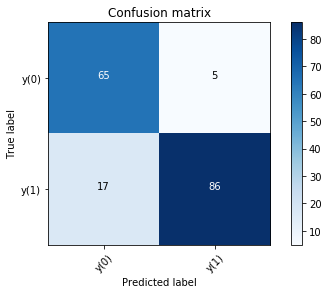

In [34]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['y(0)','y(1)'],normalize= False,  title='Confusion matrix')

In [35]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.8739191253265757

In [36]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.8728323699421965